In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data['Taxable.Income'] = np.where(data['Taxable.Income'] <= 30000, 'Risky', 'Good')

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [5]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:xlabel='Marital.Status'>

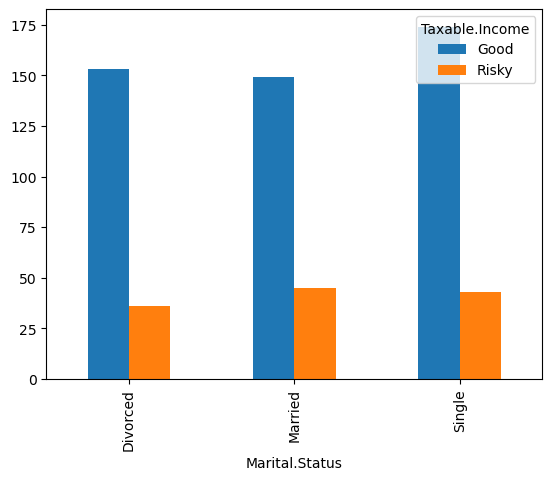

In [6]:
pd.crosstab(data['Marital.Status'], data['Taxable.Income']).plot(kind = 'bar')

<AxesSubplot:xlabel='Undergrad'>

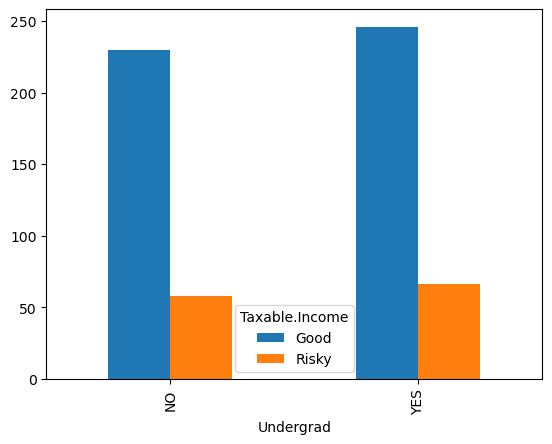

In [7]:
pd.crosstab(data['Undergrad'], data['Taxable.Income']).plot(kind = 'bar')

<AxesSubplot:xlabel='Urban'>

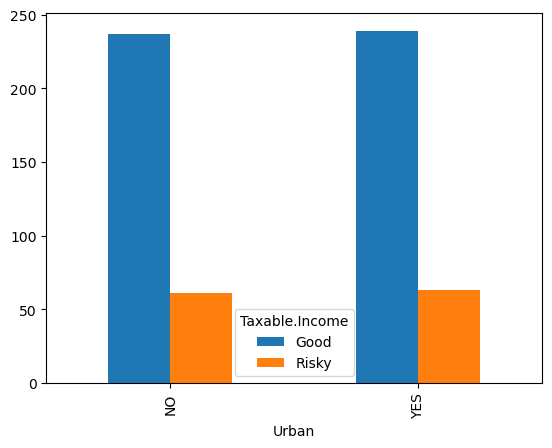

In [8]:
pd.crosstab(data['Urban'], data['Taxable.Income']).plot(kind = 'bar')

<AxesSubplot:xlabel='Work.Experience'>

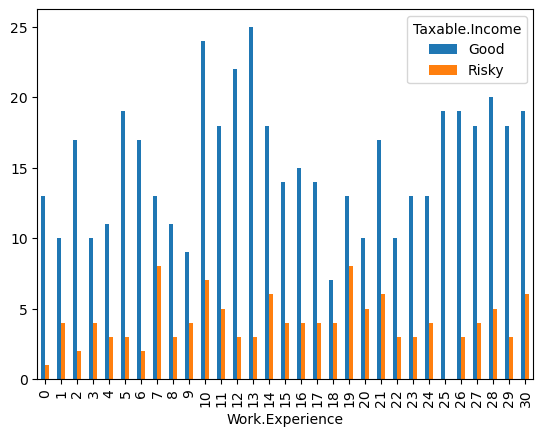

In [9]:
pd.crosstab(data['Work.Experience'], data['Taxable.Income']).plot(kind = 'bar')

<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

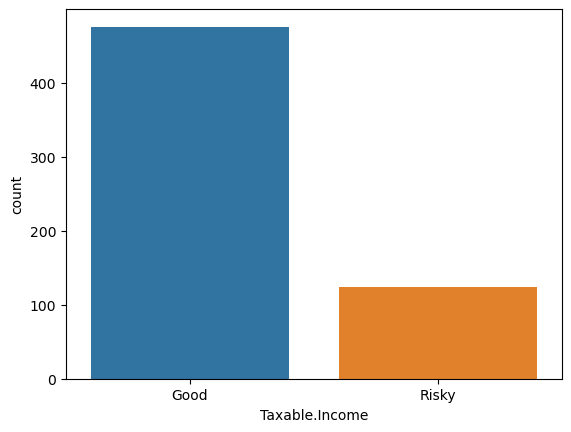

In [10]:
sns.countplot(data['Taxable.Income'])

##### Mapping

In [11]:
data['Marital.Status'] = data['Marital.Status'].map({'Single':0, 'Married': 1, 'Divorced': 2})

In [12]:
data['Urban'] = data['Urban'].map({'NO': 0, 'YES': 1})

In [13]:
data['Undergrad'] = data['Undergrad'].map({'NO': 0, 'YES': 1})

In [14]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,Good,50047,10,1
1,1,2,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,0,Good,193264,15,1
4,0,1,Good,27533,28,0


#### Train-Test Split

In [15]:
features = data.drop('Taxable.Income', axis = 1)
Y = data['Taxable.Income']

In [16]:
Y.shape

(600,)

In [17]:
Y = Y.map({'Good': 0, 'Risky': 1})

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size = 0.2, random_state = 1)

In [19]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (480, 5)
y_train:  (480,)
x_test:  (120, 5)
y_test:  (120,)


#### entropy model

In [25]:
entropy_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 5)
entropy_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=5)

In [26]:
entropy_pred = entropy_model.predict(x_test)
entropy_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
print(confusion_matrix(y_test, entropy_pred))

[[92  5]
 [23  0]]


In [44]:
print(accuracy_score(y_test, pred))

0.7666666666666667


In [28]:
print(classification_report(y_test, entropy_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        97
           1       0.00      0.00      0.00        23

    accuracy                           0.77       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.77      0.70       120



#### gini model

In [32]:
gini_model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 8)
gini_model.fit(x_train, y_train)

RandomForestClassifier(random_state=8)

In [33]:
gini_pred = gini_model.predict(x_test)
gini_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
print(confusion_matrix(y_test, gini_pred))

[[92  5]
 [23  0]]
